In [1]:
!pip install networkx

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [3]:
n = 4  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)

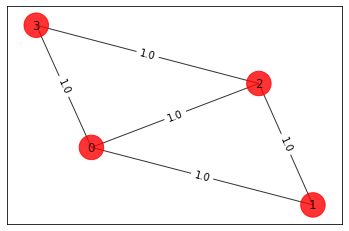

In [4]:
def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
    
draw_graph(G, colors, pos)

In [5]:
# Computing the weight matrix from the random graph
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = temp["weight"]
print(w)

[[0. 1. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]]


In [6]:
import perceval as pcvl
from perceval.components import PS, BS
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.rcdefaults()

In [7]:
num_modes = len(w) * 2

In [8]:
def U_B(my_circuit1,betas):
    layers = len(betas)
    for layer in range(layers):
        beta = betas[layer]
        for wire in range(0,num_modes,2):
            my_circuit1.add(wire,BS.Rx(2 * beta))

In [12]:
# elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
from perceval.components import catalog
def U_C(my_circuit1,gammas,edge_list):
    layers = len(gammas)
    cnot = catalog['heralded cnot'].as_processor().build()
    for layer in range(layers):
        gamma = gammas[layer]
        for edge in edge_list:
            print(edge)
            wire1 = edge[0]*2
            wire2 = edge[1]*2
            my_circuit1.add([wire1,wire1+1,wire2,wire2+1],cnot)
            my_circuit1.add(wire2,BS.H())
            my_circuit1.add(wire2,BS.Rx(2*gamma))
            my_circuit1.add(wire2,BS.H())
            my_circuit1.add([wire1,wire1+1,wire2,wire2+1],cnot)

In [15]:
def circuit(betas,gammas,edge,elist,n_layers=1):
    source = pcvl.Source() 
    QPU = pcvl.Processor("SLOS",8,source)
    
    for wire in range(0,num_modes,2):
        QPU.add(wire,BS.H())
    
    U_B(QPU,betas)
    U_C(QPU,gammas,elist)
    
    return QPU

[[0.00608128]
 [0.00692893]]
(0, 1, 1.0)
(0, 2, 1.0)
(0, 3, 1.0)
(1, 2, 1.0)
(2, 3, 1.0)


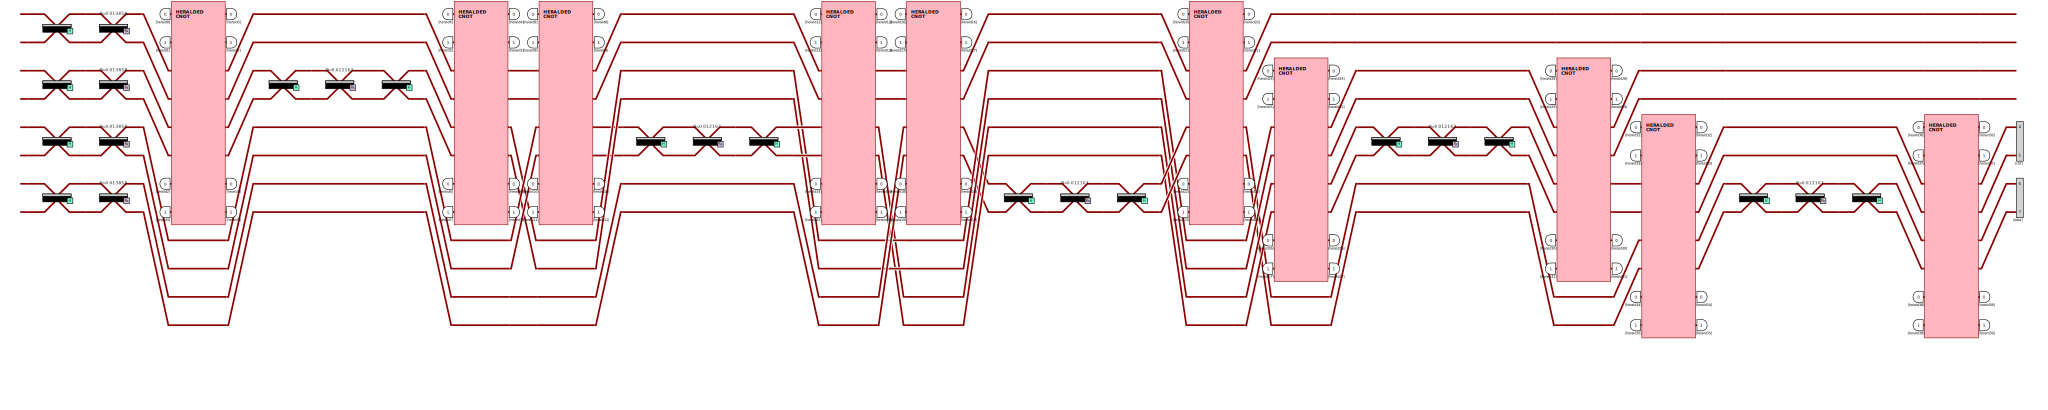

In [16]:
init_params = 0.01 * np.random.rand(2, 1)
print(init_params)
QPU = circuit(init_params[0],init_params[1],None,elist)
pcvl.pdisplay(QPU)

[[0.0058631]]
(0, 1, 1.0)
(0, 2, 1.0)
(0, 3, 1.0)
(1, 2, 1.0)
(2, 3, 1.0)


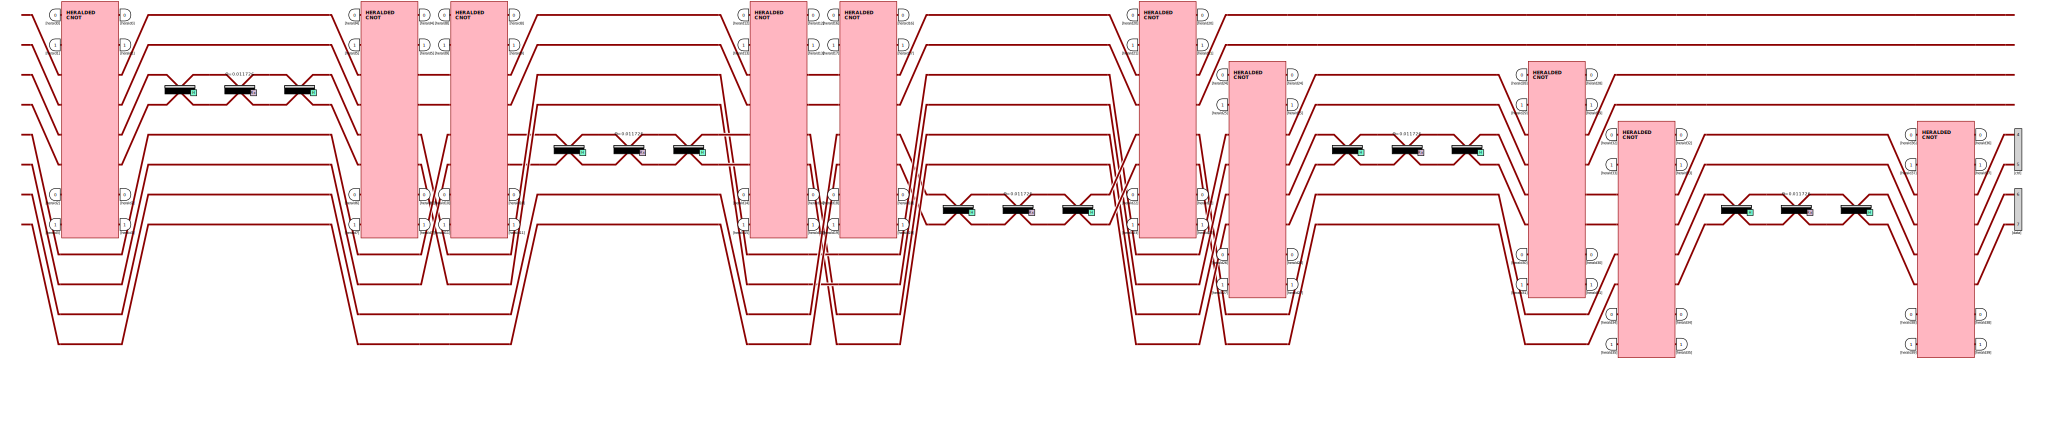

In [13]:
source = pcvl.Source() 
QPU = pcvl.Processor("SLOS",8,source)
init_params = 0.01 * np.random.rand(1, 1)
print(init_params)
U_C(QPU,init_params[0],elist)

#QPU.with_input(pcvl.BasicState([1, 0, 1, 0, 1, 0, 1, 0]))
pcvl.pdisplay(QPU)

#output_distribution=QPU.probs()["results"]
#pcvl.pdisplay(output_distribution, max_v=10)